In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
show_no_show = pd.read_csv('data/show_no_show.csv')

In [3]:
show_no_show.head(10)

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,None,0,0,No
1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,None,0,0,No
2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,None,0,0,No
3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,None,0,0,No
4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,None,0,0,No
5,5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,None,0,0,No
6,6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,None,0,0,Yes
7,7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,None,0,0,Yes
8,8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,None,0,0,No
9,9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,None,0,0,No


In [4]:
show_no_show.shape

(110527, 15)

In [5]:
show_no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
Unnamed: 0        110527 non-null int64
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110182 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null object
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(6)
memory usage: 12.6+ MB


In [6]:
show_no_show['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [7]:
show_cases = show_no_show[show_no_show['No-show'] == 'Yes']['No-show'].count()
total_cases = show_no_show['No-show'].count()

no_show_rate = show_cases/total_cases
show_rate = (total_cases-show_cases)/total_cases

print(f'Percentage of patients that do not show up for their medical appointment: {round(no_show_rate*100,2)}%')
print(f'Percentage of patients that show up for their medical appointment: {round(show_rate*100,2)}%')

Percentage of patients that do not show up for their medical appointment: 20.19%
Percentage of patients that show up for their medical appointment: 79.81%


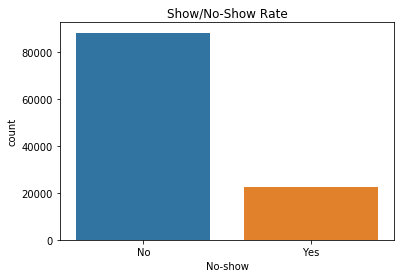

In [8]:
ax = sns.countplot(x= show_no_show['No-show'], data=show_no_show)
ax.set_title("Show/No-Show Rate")
plt.show()

In [4]:
# Checking for missing values
show_no_show.isnull().sum()

Unnamed: 0          0
PatientId           0
AppointmentID       0
Gender            345
ScheduledDay        0
AppointmentDay      0
Age                 0
Neighbourhood       0
Scholarship         0
Hipertension        0
Diabetes            0
Alcoholism          0
Handcap             0
SMS_received        0
No-show             0
dtype: int64

In [5]:
# Checking how different are the values in both columns

print('ScheduledDay column:', '\n\n', show_no_show['ScheduledDay'],'\n\n')
print('AppointmentDay column:', '\n\n', show_no_show['AppointmentDay'])

ScheduledDay column: 

 0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: ScheduledDay, Length: 110527, dtype: object 


AppointmentDay column: 

 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object


In [6]:
# Stripping strings from both columns 

show_no_show['ScheduledDay'] = show_no_show['ScheduledDay'].str.replace(r"[A-Z]",' ')
show_no_show['AppointmentDay'] = show_no_show['AppointmentDay'].str.replace(r"[A-Z]",' ')

In [7]:
print('ScheduledDay column:', '\n\n', show_no_show['ScheduledDay'], '\n\n')
print('AppointmentDay column:','\n\n', show_no_show['AppointmentDay'] )

ScheduledDay column: 

 0         2016-04-29 18:38:08 
1         2016-04-29 16:08:27 
2         2016-04-29 16:19:04 
3         2016-04-29 17:29:31 
4         2016-04-29 16:07:23 
                  ...         
110522    2016-05-03 09:15:35 
110523    2016-05-03 07:27:33 
110524    2016-04-27 16:03:52 
110525    2016-04-27 15:09:23 
110526    2016-04-27 13:30:56 
Name: ScheduledDay, Length: 110527, dtype: object 


AppointmentDay column: 

 0         2016-04-29 00:00:00 
1         2016-04-29 00:00:00 
2         2016-04-29 00:00:00 
3         2016-04-29 00:00:00 
4         2016-04-29 00:00:00 
                  ...         
110522    2016-06-07 00:00:00 
110523    2016-06-07 00:00:00 
110524    2016-06-07 00:00:00 
110525    2016-06-07 00:00:00 
110526    2016-06-07 00:00:00 
Name: AppointmentDay, Length: 110527, dtype: object


In [8]:
# Transforming the column type to datetime
show_no_show['Scheduled'] = pd.to_datetime(show_no_show['ScheduledDay'])
show_no_show['Appointment'] = pd.to_datetime(show_no_show['AppointmentDay'])

# Adding a Week_day column for each of the dates columns
show_no_show['Scheduled_week_day'] = show_no_show['Scheduled'].dt.day_name()
show_no_show['Appointment_week_day'] = show_no_show['Appointment'].dt.day_name()

In [9]:
show_no_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 19 columns):
Unnamed: 0              110527 non-null int64
PatientId               110527 non-null float64
AppointmentID           110527 non-null int64
Gender                  110182 non-null object
ScheduledDay            110527 non-null object
AppointmentDay          110527 non-null object
Age                     110527 non-null int64
Neighbourhood           110527 non-null object
Scholarship             110527 non-null int64
Hipertension            110527 non-null int64
Diabetes                110527 non-null int64
Alcoholism              110527 non-null object
Handcap                 110527 non-null int64
SMS_received            110527 non-null int64
No-show                 110527 non-null object
Scheduled               110527 non-null datetime64[ns]
Appointment             110527 non-null datetime64[ns]
Scheduled_week_day      110527 non-null object
Appointment_week_day    110527 non

In [10]:
show_no_show['Appointment'].count() == show_no_show['Scheduled'].count()

True

In [11]:
# Creating a flag to tell wether the Appointment is in the same day as it was scheduled or not

show_no_show['Same_Day_Flag'] = show_no_show['Scheduled_week_day'] == show_no_show['Appointment_week_day']

In [12]:
show_no_show.head(10)

,Unnamed: 0,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Scheduled,Appointment,Scheduled_week_day,Appointment_week_day,Same_Day_Flag
0,0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,None,0,0,No,2016-04-29 18:38:08,2016-04-29,Friday,Friday,True
1,1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,None,0,0,No,2016-04-29 16:08:27,2016-04-29,Friday,Friday,True
2,2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,None,0,0,No,2016-04-29 16:19:04,2016-04-29,Friday,Friday,True
3,3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,None,0,0,No,2016-04-29 17:29:31,2016-04-29,Friday,Friday,True
4,4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,None,0,0,No,2016-04-29 16:07:23,2016-04-29,Friday,Friday,True
5,5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29 00:00:00,76,REPÚBLICA,0,1,0,None,0,0,No,2016-04-27 08:36:51,2016-04-29,Wednesday,Friday,False
6,6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29 00:00:00,23,GOIABEIRAS,0,0,0,None,0,0,Yes,2016-04-27 15:05:12,2016-04-29,Wednesday,Friday,False
7,7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29 00:00:00,39,GOIABEIRAS,0,0,0,None,0,0,Yes,2016-04-27 15:39:58,2016-04-29,Wednesday,Friday,False
8,8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29 00:00:00,21,ANDORINHAS,0,0,0,None,0,0,No,2016-04-29 08:02:16,2016-04-29,Friday,Friday,True
9,9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29 00:00:00,19,CONQUISTA,0,0,0,None,0,0,No,2016-04-27 12:48:25,2016-04-29,Wednesday,Friday,False


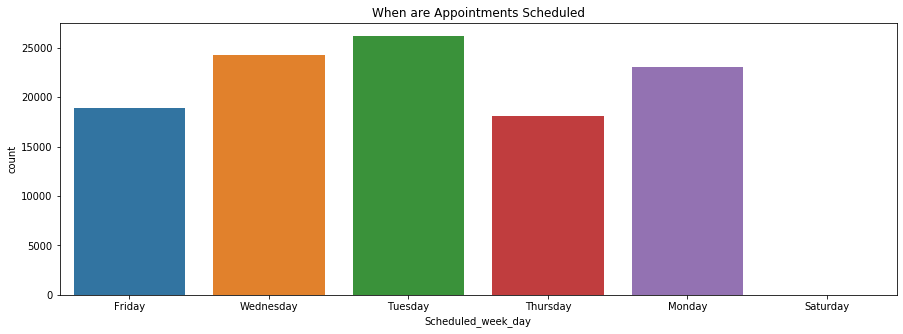

In [20]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=show_no_show['Scheduled_week_day'])
ax.set_title("When are Appointments Scheduled")
plt.show()

In [22]:
show_no_show['Scheduled_week_day'].unique()

array(['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Saturday'],
      dtype=object)

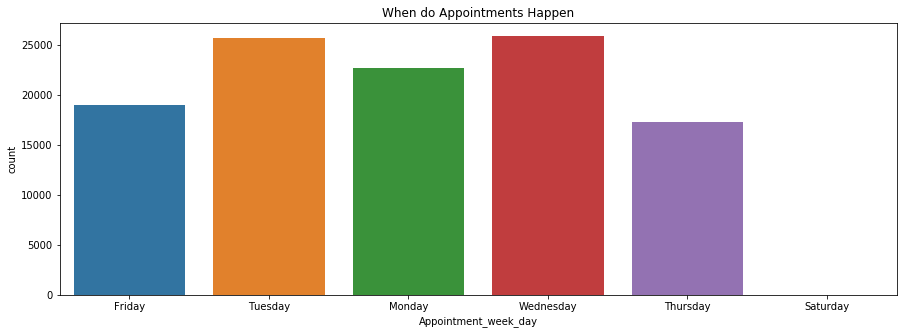

In [21]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=show_no_show['Appointment_week_day'])
ax.set_title("When do Appointments Happen")
plt.show()

In [23]:
show_no_show['Appointment_week_day'].unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

In [29]:
# The abs() function is used to return the absolute value of a number (eg: abs(-5) = 5)

show_no_show['Days_to_appointment'] = (show_no_show['Appointment'] - show_no_show['Scheduled']).dt.days

In [16]:
show_no_show[['Scheduled','Scheduled_week_day','Appointment','Appointment_week_day',
              'Same_Day_Flag','Days_to_appointment']]

,Scheduled,Scheduled_week_day,Appointment,Appointment_week_day,Same_Day_Flag,Days_to_appointment
0,2016-04-29 18:38:08,Friday,2016-04-29,Friday,True,1
1,2016-04-29 16:08:27,Friday,2016-04-29,Friday,True,1
2,2016-04-29 16:19:04,Friday,2016-04-29,Friday,True,1
3,2016-04-29 17:29:31,Friday,2016-04-29,Friday,True,1
4,2016-04-29 16:07:23,Friday,2016-04-29,Friday,True,1
...,...,...,...,...,...,...
110522,2016-05-03 09:15:35,Tuesday,2016-06-07,Tuesday,True,34
110523,2016-05-03 07:27:33,Tuesday,2016-06-07,Tuesday,True,34
110524,2016-04-27 16:03:52,Wednesday,2016-06-07,Tuesday,False,40
110525,2016-04-27 15:09:23,Wednesday,2016-06-07,Tuesday,False,40
